## Time Series Analysis
Pandas Time Series analysis tools are powerful, flexible, and easy to use.

The main data structures for time series data in Pandas are:

* Timestamp - represents a single timestamp (e.g., a specific date and time).
* DatetimeIndex - a collection of timestamps that form an index for time series data.
* Period - represents a single time span (e.g., a month, a quarter, a year).
* PeriodIndex - a collection of time spans forming an index for time series data.
* Timedelta - represents a duration or an amount of time.
* TimedeltaIndex - a collection of time durations forming an index for time series data.

Pandas provides many functions to work with time series data, including:

* `Resampling` - changing the frequency of the time series data.
* `Shifting` - moving data forward or backward in time.
* `Rolling` - computing rolling statistics (e.g., rolling mean, rolling standard deviation).
* `Time zone handling` - converting data to and from different time zones.
* `Time series visualization` - creating plots and visualizations of time series data.

Some examples of Pandas Time Series analysis include:

* Resampling daily stock data to monthly data.
* Computing a rolling average of temperature data.
* Shifting a time series by one month to analyze seasonality.
* Converting time series data to a different time zone.
* Creating time series visualizations to analyze trends and patterns over time.

## Resampling time series data
You can resample time series data to a different frequency, such as aggregating daily data into weekly or monthly data.  
For example, you can use the `resample()` method to resample daily data to monthly data:

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Create a time series with daily data
dates = pd.date_range('2022-01-01', periods=1000, freq='D')
ts = pd.Series(np.random.randn(len(dates)), index=dates)

# Resample to monthly data
ts_monthly = ts.resample('M').mean()

In [5]:
pd.date_range('2022-01-01', periods=24, freq='Y')

DatetimeIndex(['2022-12-31', '2023-12-31', '2024-12-31', '2025-12-31',
               '2026-12-31', '2027-12-31', '2028-12-31', '2029-12-31',
               '2030-12-31', '2031-12-31', '2032-12-31', '2033-12-31',
               '2034-12-31', '2035-12-31', '2036-12-31', '2037-12-31',
               '2038-12-31', '2039-12-31', '2040-12-31', '2041-12-31',
               '2042-12-31', '2043-12-31', '2044-12-31', '2045-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [9]:
ts.resample('M').sum()

2022-01-31   -6.246113
2022-02-28   -4.008713
2022-03-31    1.362088
2022-04-30   -0.607549
2022-05-31   -2.598251
2022-06-30    8.738773
2022-07-31    3.048558
2022-08-31   -0.667639
2022-09-30   -2.732112
2022-10-31    2.014877
2022-11-30    6.977132
2022-12-31   -1.650615
Freq: M, dtype: float64

2022-01-01    0.496714
2022-01-02   -0.138264
2022-01-03    0.647689
2022-01-04    1.523030
2022-01-05   -0.234153
Freq: D, dtype: float64


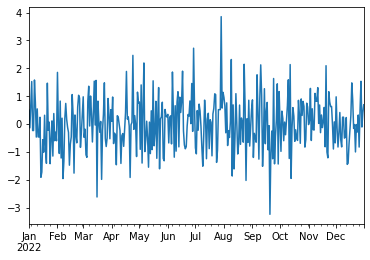

In [7]:
print(ts.head())
ts.plot()
plt.show()

2022-01-31   -0.201488
2022-02-28   -0.143168
2022-03-31    0.043938
2022-04-30   -0.020252
2022-05-31   -0.083815
Freq: M, dtype: float64


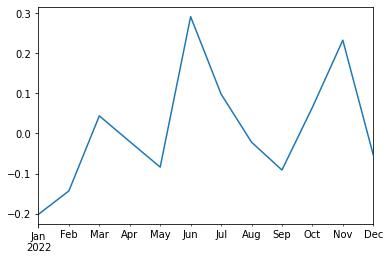

In [10]:
print(ts_monthly.head())
ts_monthly.plot()
plt.show()

## Shifting time series data
You can shift time series data forward or backward in time, which can be useful for calculating changes over time.   
For example, you can use the `shift()` method to calculate the percentage change in a time series:

In [16]:
# Calculate the percentage change in the time series
ts_pct_change = ts.pct_change().shift(-1)


2022-01-01   -1.278358
2022-01-02   -5.684423
2022-01-03    1.351485
2022-01-04   -1.153742
2022-01-05   -0.000070
Freq: D, dtype: float64


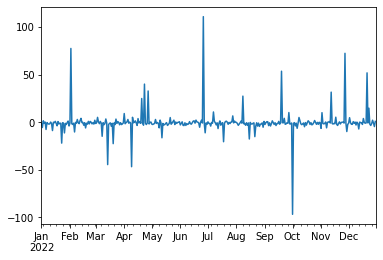

In [17]:

print(ts_pct_change.head())
ts_pct_change.plot()
plt.show()

## Rolling window calculations
You can perform rolling window calculations on time series data, such as calculating rolling means or standard deviations.  
For example, you can use the `rolling()` method to calculate a rolling mean over a 30-day window:

2022-01-01   NaN
2022-01-02   NaN
2022-01-03   NaN
2022-01-04   NaN
2022-01-05   NaN
Freq: D, dtype: float64


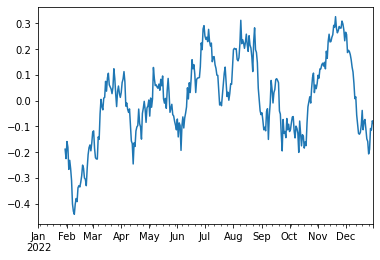

In [20]:
# Calculate a rolling 30-day mean
ts_rolling_mean = ts.rolling(window=30).mean()

print(ts_rolling_mean.head())
ts_rolling_mean.plot()
plt.show()

## Time-based indexing and selection
You can use time-based indexing and selection to extract specific time periods from a time series.  
For example, you can use the `loc[]` operator to select data for a specific date range:

2022-01-01    0.496714
2022-01-02   -0.138264
2022-01-03    0.647689
2022-01-04    1.523030
2022-01-05   -0.234153
Freq: D, dtype: float64


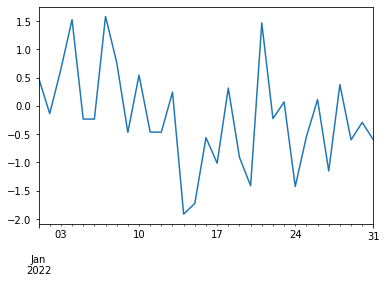

In [21]:
# Select data for a specific date range
ts_subset = ts.loc['2022-01-01':'2022-01-31']

print(ts_subset.head())
ts_subset.plot()
plt.show()

## Time zone handling
You can handle time zones in Pandas, including converting between time zones and handling daylight saving time.  
For example, you can use the `tz_convert()` method to convert a time series to a different time zone:

In [22]:
# Convert time series to a different time zone
ts_utc = ts.tz_localize('UTC')
ts_new_york = ts_utc.tz_convert('America/New_York')

In [23]:
ts_utc.head()

2022-01-01 00:00:00+00:00    0.496714
2022-01-02 00:00:00+00:00   -0.138264
2022-01-03 00:00:00+00:00    0.647689
2022-01-04 00:00:00+00:00    1.523030
2022-01-05 00:00:00+00:00   -0.234153
Freq: D, dtype: float64

In [24]:
ts_new_york.head()

2021-12-31 19:00:00-05:00    0.496714
2022-01-01 19:00:00-05:00   -0.138264
2022-01-02 19:00:00-05:00    0.647689
2022-01-03 19:00:00-05:00    1.523030
2022-01-04 19:00:00-05:00   -0.234153
Freq: D, dtype: float64

> Content created by **Carlos Cruz-Maldonado**.  
> Feel free to ping me at any time.